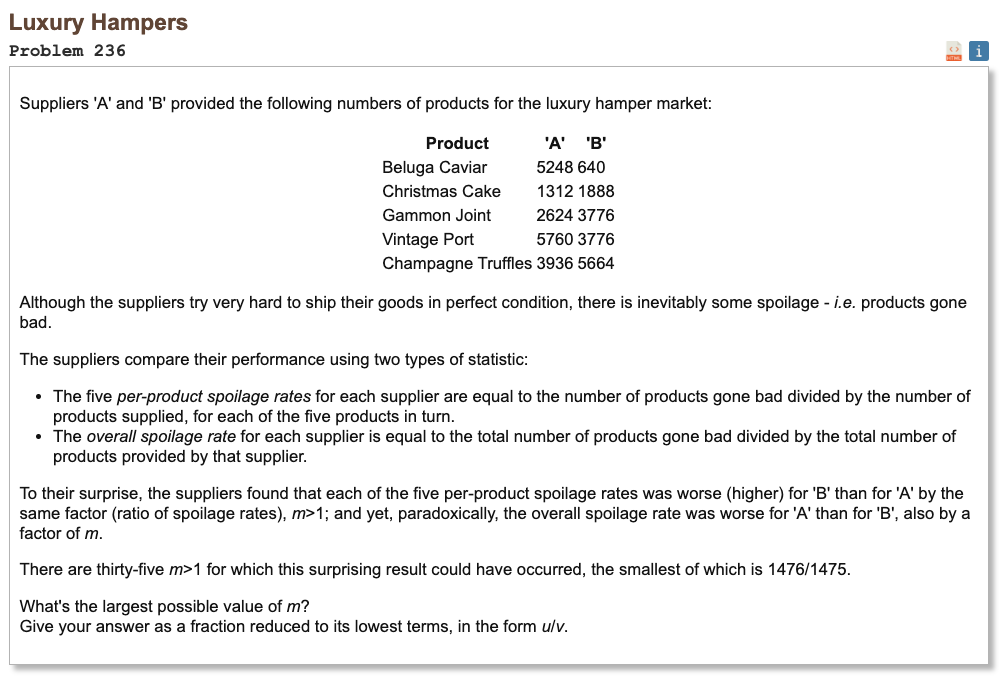

## Initial approach

* rewrite the per product condition so each bad count for B is a fixed rational multiple of the bad count for A
* notice three products share the same B over A supply ratio 59 over 41, so their bad counts scale in the same simple way
* introduce a helper ratio c so that b2 = c a2, b3 = c a3, b5 = c a5, and then express b1 and b4 using the same c
* use the overall condition to turn the problem into one equation for c² in terms of the total bad counts and a weighted sum D
* pick a1 as a multiple of 59 and a4 as a multiple of 90 so the weighted sum D becomes an integer and the square test becomes fast
* for each possible (a1, a4, s) compute c² as a reduced fraction and keep only cases where numerator and denominator are perfect squares
* for each candidate c, check that all five b values are integers and fit within the supplied limits, then confirm a2, a3, a5 exist with sum s
* track the largest m = 41c over 59 and print it as a reduced fraction

In [1]:
import math
from fractions import Fraction
from collections import defaultdict

A1, A2, A3, A4, A5 = 5248, 1312, 2624, 5760, 3936
B1, B2, B3, B4, B5 = 640, 1888, 3776, 3776, 5664

def is_square(n):
    r = int(math.isqrt(n))
    return r * r == n

def sqrt_reduced_fraction(num, den):
    g = math.gcd(num, den)
    num //= g
    den //= g
    if not is_square(num) or not is_square(den):
        return None
    a = int(math.isqrt(num))
    b = int(math.isqrt(den))
    g2 = math.gcd(a, b)
    return a // g2, b // g2

def build_sum_set(cd, max_a3, max_a5):
    sums = {}
    for a3 in range(cd, max_a3 + 1, cd):
        for a5 in range(cd, max_a5 + 1, cd):
            s = a3 + a5
            if s not in sums:
                sums[s] = (a3, a5)
    return sums

def solve():
    max_m = Fraction(0, 1)
    cache = {}
    max_x1 = A1 // 59
    max_y4 = A4 // 90
    max_s = A2 + A3 + A5

    for x1 in range(1, max_x1 + 1):
        for y4 in range(1, max_y4 + 1):
            a1 = 59 * x1
            a4 = 90 * y4

            A0 = a1 + a4
            D0 = 5 * x1 + 41 * y4

            b1_min_ok = True

            for s in range(3, max_s + 1):
                num = 6 * (A0 + s)
                den = 5 * (D0 + s)
                sq = sqrt_reduced_fraction(num, den)
                if sq is None:
                    continue

                cn, cd = sq
                if cn <= cd:
                    continue

                b1 = Fraction(5 * cn * x1, cd)
                b4 = Fraction(41 * cn * y4, cd)
                if b1.denominator != 1 or b4.denominator != 1:
                    continue
                if b1 <= 0 or b4 <= 0 or b1 > B1 or b4 > B4:
                    continue

                max_a2 = min(A2, (B2 * cd) // cn)
                max_a3 = min(A3, (B3 * cd) // cn)
                max_a5 = min(A5, (B5 * cd) // cn)
                if max_a2 < cd or max_a3 < cd or max_a5 < cd:
                    continue

                key = (cd, max_a3, max_a5)
                if key in cache:
                    sums35 = cache[key]
                else:
                    sums35 = build_sum_set(cd, max_a3, max_a5)
                    cache[key] = sums35

                found = False
                for a2 in range(cd, max_a2 + 1, cd):
                    rem = s - a2
                    if rem in sums35:
                        a3, a5 = sums35[rem]
                        b2 = Fraction(cn * a2, cd)
                        b3 = Fraction(cn * a3, cd)
                        b5 = Fraction(cn * a5, cd)
                        if b2.denominator == 1 and b3.denominator == 1 and b5.denominator == 1:
                            if b2 <= B2 and b3 <= B3 and b5 <= B5:
                                found = True
                                break

                if not found:
                    continue

                m = Fraction(41 * cn, 59 * cd)
                if m > max_m:
                    max_m = m

    return max_m

In [2]:
%%time
result = solve()
print("Result:", f"{result.numerator}/{result.denominator}")

Result: 123/59
CPU times: user 11.7 s, sys: 92 ms, total: 11.7 s
Wall time: 12 s
